## Final Project Submission

Please fill out: 
* Student name:Justin Maffucci
* Student pace: full time
* Scheduled project review date/time: Thursday, March 25, 11:30am
* Instructor name: James Irving
* Blog post URL:


# Microsoft Studios

**By:** Justin Maffucci

## Overview

Microsoft had decided to enter the original content video production business. In order to do so effectively, it's necessary to examine the current data and trends in the industry. Valuable insights can be gained by analyzing data from IMDB, Box Office Mojo, and The Numbers. Data from each of these sources must be cleaned, organized, and occasionally excluded for proper analysis.

## Business Problem

There are three main questions we are aiming to solve. Two of the three questions pertain to financial success metrics. The third question will help to answer what factors contribute to high vs. low movie rating reviews.

1. Which movie genre is most profitable in terms of return on initial investment?
2. Which directors' movies have been the most successful financially?
3. How does the length of the movie affect ratings?

## Data Understanding

- **Data Sources:** IMDB, Box Office Mojo, The Numbers
- **Variables Included:** Movie titles, cast & crew, release date, financial metrics, ratings, genres, and runtime.


In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

folder = "/Users/justinmaffucci/Desktop/FlatironSchool/Phase1/Project/dsc-phase-1-project/zippedData/"

In [2]:
files = glob.glob(f"{folder}*.csv*")
## Source: James Irving

In [3]:
(f"{folder}*.csv*")
### Source: James Irving

'/Users/justinmaffucci/Desktop/FlatironSchool/Phase1/Project/dsc-phase-1-project/zippedData/*.csv*'

In [4]:
files[0].replace(".csv.gz", '').split('/')[-1].replace('.','_')
### Source: James Irving

'imdb_title_crew'

### Importing Data

The cell below imports and displays a preview of all available data. A subset of the available data will be selected and cleaned for further analysis.

In [5]:
tables = {}
dashes = '---'*25

for file in files:
    table_name = file.replace(".csv.gz", '').split('/')[-1].replace('.','_')
    print(dashes)
    
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()
    
### Source: James Irving

---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


## Data Preparation

### Merging Tables

First, we will merge IMDB Title Basics with IMDB Title Ratings. Next, we'll merge Box Office Mojo's financial metrics with those from The Numbers.

In [6]:
titles_ratings = pd.merge(tables['imdb_title_basics'], 
                                                 tables['imdb_title_ratings'])

titles_ratings_crew = pd.merge(titles_ratings, tables['imdb_title_crew'])

tables['imdb_name_basics'].rename(columns={'nconst': 'directors'},          
                                                                inplace=True)
titles_ratings_crew = pd.merge(titles_ratings_crew, tables['imdb_name_basics'], 
                                                              on='directors')

financials = pd.merge(tables['bom_movie_gross'], tables['tn_movie_budgets'], 
                                          left_on='title', right_on='movie')

In [7]:
display(titles_ratings_crew.head(2))
display(financials.head(2))

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,NaN,Mani Kaul,1944.0,2011.0,"director,writer,actor","tt0102515,tt0070009,tt0066514,tt0207626"


,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"


### Remove redundant and irrelevant columns.

In [8]:
titles_ratings_crew.drop(['original_title', 'writers', 'birth_year',
                        'death_year','primary_profession','known_for_titles'],
                                                         axis=1, inplace=True)


financials.drop(['studio', 'domestic_gross_x', 'foreign_gross', 'id',
                'release_date', 'movie','domestic_gross_y'], axis=1,
                                                               inplace=True)
display(financials.head(2))
display(titles_ratings_crew.head(2))

,title,year,production_budget,worldwide_gross
0,Toy Story 3,2010,"$200,000,000","$1,068,879,522"
1,Inception,2010,"$160,000,000","$835,524,642"


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,primary_name
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul


### Merge two cleaned tables.

This final table will be used for the majority of our analysis.

In [9]:
df = pd.merge(financials, titles_ratings_crew, left_on='title', 
                                                    right_on='primary_title')
display(df.head(2))

,title,year,production_budget,worldwide_gross,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,primary_name
0,Toy Story 3,2010,"$200,000,000","$1,068,879,522",tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich
1,Inception,2010,"$160,000,000","$835,524,642",tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan


### Drop redundant and irrelevant columns.

In [10]:
df.drop(['start_year', 'tconst', 'primary_title','directors'], 
                                                        axis=1, inplace=True)
df.head(2)

,title,year,production_budget,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,primary_name
0,Toy Story 3,2010,"$200,000,000","$1,068,879,522",103.0,"Adventure,Animation,Comedy",8.3,682218,Lee Unkrich
1,Inception,2010,"$160,000,000","$835,524,642",148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Christopher Nolan


### Handle duplicate movies.

Check if there are duplicates.

In [11]:
df.duplicated(subset='title').sum()

214

Remove duplicates.

In [12]:
df.drop_duplicates(subset=['title'], inplace=True)
df.duplicated(subset='title').sum()

0

### Handle Null Values

Check for null values

In [13]:
df.isna().sum()

title                0
year                 0
production_budget    0
worldwide_gross      0
runtime_minutes      3
genres               1
averagerating        0
numvotes             0
primary_name         0
dtype: int64

Remove null values.

In [14]:
df.dropna(axis=0, subset=['genres', 'runtime_minutes'], inplace=True)

In [15]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1279
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1062 non-null   object 
 1   year               1062 non-null   int64  
 2   production_budget  1062 non-null   object 
 3   worldwide_gross    1062 non-null   object 
 4   runtime_minutes    1062 non-null   float64
 5   genres             1062 non-null   object 
 6   averagerating      1062 non-null   float64
 7   numvotes           1062 non-null   int64  
 8   primary_name       1062 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 83.0+ KB


None

### Change financial metric columns to integer values.

1. Remove commas from each cell in the production budget column and the worldwide gross column.
2. Remove dollar signs from each cell in the previously mentioned columns.
3. Change data types from object (string) to integers.

In [16]:
df['production_budget'].replace(',','', regex=True, inplace=True)
df['worldwide_gross'].replace(',','', regex=True, inplace=True)


df['production_budget'] = df['production_budget'].str.replace('$','')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$','')


df['production_budget'] = df['production_budget'].astype(int)
df['worldwide_gross'] = df['worldwide_gross'].astype(int)

display(df.info())
display(df.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1279
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1062 non-null   object 
 1   year               1062 non-null   int64  
 2   production_budget  1062 non-null   int64  
 3   worldwide_gross    1062 non-null   int64  
 4   runtime_minutes    1062 non-null   float64
 5   genres             1062 non-null   object 
 6   averagerating      1062 non-null   float64
 7   numvotes           1062 non-null   int64  
 8   primary_name       1062 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 83.0+ KB


None

,title,year,production_budget,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,primary_name
0,Toy Story 3,2010,200000000,1068879522,103.0,"Adventure,Animation,Comedy",8.3,682218,Lee Unkrich
1,Inception,2010,160000000,835524642,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Christopher Nolan


### Feature Engineering

Create a Profit/Loss column and a Return on Investment column.

In [17]:
df['Profit/Loss'] = (df['worldwide_gross'] - df['production_budget'])
df['ROI'] = (df['Profit/Loss'] / df['production_budget'])
df.head(2)

,title,year,production_budget,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,primary_name,Profit/Loss,ROI
0,Toy Story 3,2010,200000000,1068879522,103.0,"Adventure,Animation,Comedy",8.3,682218,Lee Unkrich,868879522,4.344398
1,Inception,2010,160000000,835524642,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Christopher Nolan,675524642,4.222029


### Clean columns

Reorder and capitalize columns.

In [18]:
df = df[['title', 'year', 'primary_name', 'genres', 'worldwide_gross',
        'production_budget', 'Profit/Loss', 'ROI', 'runtime_minutes',
        'averagerating','numvotes']]
df.columns = ['Title', 'Release Year', 'Director', 'Genres', 'Worldwide Gross',
             'Production Budget', 'Profit/Loss', 'ROI', 'Runtime',
              'Avg. Rating', '# of Votes']
df.head(2)

,Title,Release Year,Director,Genres,Worldwide Gross,Production Budget,Profit/Loss,ROI,Runtime,Avg. Rating,# of Votes
0,Toy Story 3,2010,Lee Unkrich,"Adventure,Animation,Comedy",1068879522,200000000,868879522,4.344398,103.0,8.3,682218
1,Inception,2010,Christopher Nolan,"Action,Adventure,Sci-Fi",835524642,160000000,675524642,4.222029,148.0,8.8,1841066


## Data Analysis

In order to analyze genre profitability, the column changed from string values to a list, so it can be expanded using the .explode() method.

In [19]:
genre_list = []
for string in df['Genres']:
    genre_list.append(string.split(','))
df['Genres'] = genre_list
df.head(2)

,Title,Release Year,Director,Genres,Worldwide Gross,Production Budget,Profit/Loss,ROI,Runtime,Avg. Rating,# of Votes
0,Toy Story 3,2010,Lee Unkrich,"[Adventure, Animation, Comedy]",1068879522,200000000,868879522,4.344398,103.0,8.3,682218
1,Inception,2010,Christopher Nolan,"[Action, Adventure, Sci-Fi]",835524642,160000000,675524642,4.222029,148.0,8.8,1841066


In [20]:
genre_df = df.explode('Genres')
df.head(2)

,Title,Release Year,Director,Genres,Worldwide Gross,Production Budget,Profit/Loss,ROI,Runtime,Avg. Rating,# of Votes
0,Toy Story 3,2010,Lee Unkrich,"[Adventure, Animation, Comedy]",1068879522,200000000,868879522,4.344398,103.0,8.3,682218
1,Inception,2010,Christopher Nolan,"[Action, Adventure, Sci-Fi]",835524642,160000000,675524642,4.222029,148.0,8.8,1841066


In [21]:
genre_ROI = df.explode('Genres').groupby('Genres').median()['ROI']. \
                                                sort_values(ascending=True)
genre_ROI

Genres
Western       -0.486402
War           -0.111535
Music          0.746344
Crime          0.855759
Sport          0.915783
Fantasy        1.097094
Family         1.131426
History        1.136088
Drama          1.173021
Biography      1.199427
Action         1.320263
Romance        1.411546
Comedy         1.488093
Documentary    1.512141
Adventure      1.665471
Thriller       1.743471
Animation      1.876877
Musical        2.124787
Sci-Fi         2.180978
Horror         2.702271
Mystery        2.766204
Name: ROI, dtype: float64

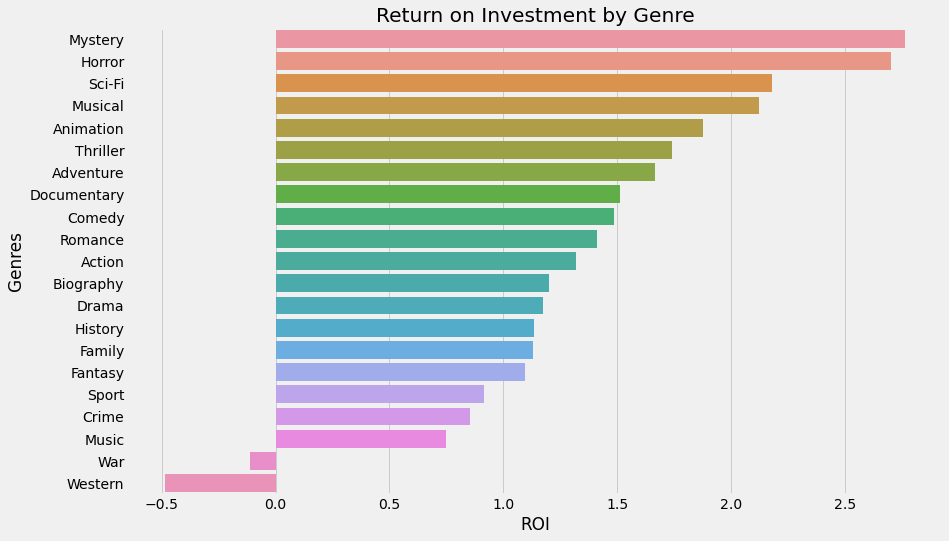

In [22]:
plt.figure(figsize=(13,8))
genre_ax = sns.barplot(y=genre_ROI.sort_values(ascending=False).index,
                                    x=genre_ROI.sort_values(ascending=False))
genre_ax.set_title('Return on Investment by Genre');

Group the dataframe by Director and create a series showing the mean ROI for each director. Display the top ten most profitable directors in descending order.

In [23]:
director_ROI = df.groupby('Director').mean()['ROI'].sort_values(ascending=False).head(10)
director_ROI

Director
William Brent Bell    100.759490
Levan Gabriadze        63.364198
Tod Williams           58.170677
Jordan Peele           50.073590
Bradley Parker         41.411721
Nitesh Tiwari          30.016276
Lynn Shelton           24.754942
David F. Sandberg      24.060147
James Wan              23.410492
Dan Trachtenberg       20.657284
Name: ROI, dtype: float64

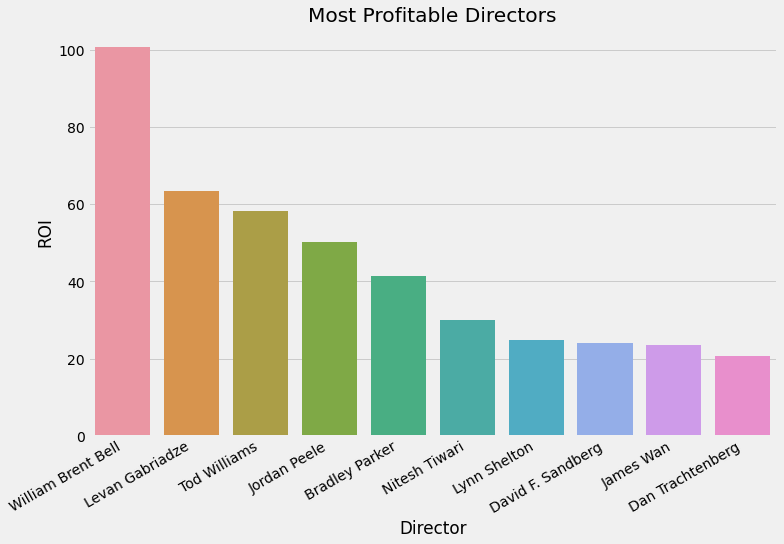

In [24]:
plt.figure(figsize=(11,7))
x_labels=director_ROI.index
bar = sns.barplot(x=director_ROI.index, y=director_ROI)
plt.xticks(rotation=30, ha='right')
bar.set_title('Most Profitable Directors');

Check to see if there is a correlation between movie length (in minutes) and average rating received.

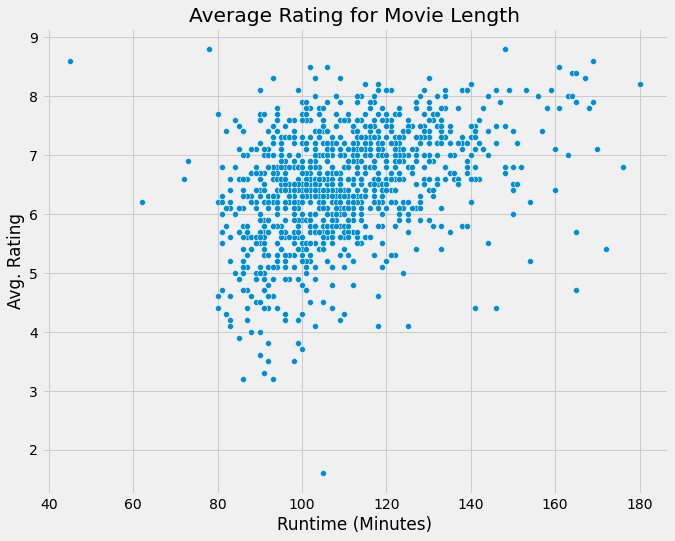

In [25]:
plt.figure(figsize=(10,8))
runtime_rating = sns.scatterplot(y=df['Avg. Rating'], x=df['Runtime'])
runtime_rating.set_title('Average Rating for Movie Length')
runtime_rating.set_xlabel('Runtime (Minutes)');

## Evaluation

### ROI by Genre

The genres with the highest median return on investment are:
1. Mystery (2.77x)
2. Sci-Fi (2.18)
3. Horror (2.70)

The genres with the lowest median return on investment are:
1. Western (-0.49x)
2. War (-0.11x)
3. Music (0.75x)

### ROI by Director

The directors who have performed the best in terms of ROI  are:
1. William Brent Bell
2. Levan Gabriadze
3. Tod Williams

### Correlation between Runtime and Average Rating

There seems to be a general positive correlation between runtime and rating.

## Conclusions

Based on the data, it would make the most sense to start production with mystery, Sci-Fi, and horror movies. Movies in these genres have performed the best over the past ten years. Choosing any of the directors shown in the "Most Profitable Directors" graph would increase the chances of the studio being successful. Each of these directors has returned 20x the initial investment. Finally, there seems to be a somewhat loose correlation between the length of the movie and the ratings it receives. Of course, correlation does not prove causation, so we should proceed with caution and additional analysis. 

In [79]:
display(df.head(3))
display(df.corr())

,Title,Release Year,Director,Genres,Worldwide Gross,Production Budget,Profit/Loss,ROI,Runtime,Avg. Rating,# of Votes
0,Toy Story 3,2010,Lee Unkrich,"[Adventure, Animation, Comedy]",1068879522,200000000,868879522,4.344398,103.0,8.3,682218
1,Inception,2010,Christopher Nolan,"[Action, Adventure, Sci-Fi]",835524642,160000000,675524642,4.222029,148.0,8.8,1841066
2,Shrek Forever After,2010,Mike Mitchell,"[Adventure, Animation, Comedy]",756244673,165000000,591244673,3.583301,93.0,6.3,167532


,Release Year,Worldwide Gross,Production Budget,Profit/Loss,ROI,Runtime,Avg. Rating,# of Votes
Release Year,1.000000,0.089984,0.037785,0.098326,0.043912,0.086992,0.026430,-0.099009
Worldwide Gross,0.089984,1.000000,0.785310,0.982371,0.141080,0.337099,0.213337,0.627898
Production Budget,0.037785,0.785310,1.000000,0.655729,-0.113649,0.346968,0.100266,0.504866
Profit/Loss,0.098326,0.982371,0.655729,1.000000,0.206365,0.306323,0.229889,0.613273
ROI,0.043912,0.141080,-0.113649,0.206365,1.000000,-0.059436,0.056530,0.146651
Runtime,0.086992,0.337099,0.346968,0.306323,-0.059436,1.000000,0.394916,0.416888
Avg. Rating,0.026430,0.213337,0.100266,0.229889,0.056530,0.394916,1.000000,0.479796
# of Votes,-0.099009,0.627898,0.504866,0.613273,0.146651,0.416888,0.479796,1.000000
